In [ ]:
import sklearn as sk
import pandas as pd
# Comment out if you did not ever face ssl error
import ssl
import numpy as np
ssl._create_default_https_context = ssl._create_unverified_context
%config Completer.use_jedi = False

In [ ]:
df = pd.read_csv('augmented_with_backtrans.csv')
df = df[['text']]
df.head(2)

,text
0,It Wasn't Gas I Passed. The smell was in compa...
1,It Wasn't Gas I Passed. was in comparison rott...


In [ ]:
# remove punctuation marks
import string

punctuation = string.punctuation

df['text'] = df['text'].apply(lambda x: ''.join(ch for ch in x if ch not in set(punctuation)))

# convert text to lowercase
df['text'] = df['text'].str.lower()

# remove numbers
df['text'] = df['text'].str.replace("[0-9]", " ")
df

<ipython-input-3-b86b3f79d5c3>:12: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace("[0-9]", " ")


,text
0,it wasnt gas i passed the smell was in compari...
1,it wasnt gas i passed was in comparison rotten...
2,information technology wasnt vaunt single pass...
3,information technology has not been passed was...
4,the foul litter box whenever i walked into my ...
...,...
1751,skin odor observe the odor skin see more about...
1752,coffee reborn the first time i walked into ste...
1753,coffee reborn the first time walked into steam...
1754,java reborn the world class clock time walk in...


## Remove stopwords

In [ ]:
import nltk 
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

for i, row in df.iterrows():
    line = row.text
    
    querywords = line.split()

    resultwords  = [word for word in querywords if word.lower() not in stopwords]
    result = ' '.join(resultwords)
    
    df.at[i, 'text'] = result


[nltk_data] Downloading package stopwords to /Users/danny/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df

,text
0,wasnt gas passed smell comparison rotten eggs ...
1,wasnt gas passed comparison rotten eggs reason...
2,information technology wasnt vaunt single pass...
3,information technology passed comparable swell...
4,foul litter box whenever walked brothers apart...
...,...
1751,skin odor observe odor skin see develops expla...
1752,coffee reborn first time walked steamdot fines...
1753,coffee reborn first time walked steamdot fines...
1754,java reborn world class clock time walk steamd...


In [ ]:
# remove whitespaces
df['text'] = df['text'].apply(lambda x:' '.join(x.split()))

In [ ]:
# Lemmatize

# import spaCy's language model
import spacy

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# function to lemmatize text
def lemmatization(texts):
    output = []
    for i in texts:
        s = [token.lemma_ for token in nlp(i)]
        output.append(' '.join(s))
    return output

In [ ]:
df['text'] = lemmatization(df['text'])
df

,text
0,be nt gas pass smell comparison rotten egg rea...
1,be nt gas pass comparison rotten egg reason me...
2,information technology be nt vaunt single pass...
3,information technology pass comparable swell t...
4,foul litter box whenever walk brother apartmen...
...,...
1751,skin odor observe odor skin see develop explai...
1752,coffee reborn first time walk steamdot fine co...
1753,coffee reborn first time walk steamdot fine co...
1754,java reborn world class clock time walk steamd...


In [ ]:
# remove whitespaces
df['text'] = df['text'].apply(lambda x:' '.join(x.split()))

In [ ]:
df

,text
0,be nt gas pass smell comparison rotten egg rea...
1,be nt gas pass comparison rotten egg reason me...
2,information technology be nt vaunt single pass...
3,information technology pass comparable swell t...
4,foul litter box whenever walk brother apartmen...
...,...
1751,skin odor observe odor skin see develop explai...
1752,coffee reborn first time walk steamdot fine co...
1753,coffee reborn first time walk steamdot fine co...
1754,java reborn world class clock time walk steamd...


In [ ]:
# def identify_tokens(row):
#     story = row['text']
#     tokens = nltk.word_tokenize(story)
#     # taken only words (not punctuation)
#     token_words = [w for w in tokens if w.isalpha()]
#     return token_words

# df['text'] = df.apply(identify_tokens, axis=1)

## sentence embedding

In [ ]:
# !pip install sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer

In [ ]:
model = SentenceTransformer('stsb-roberta-large')

100%|██████████| 1.31G/1.31G [05:36<00:00, 3.90MB/s]  


In [ ]:
test = model.encode(['hello my name is danny.'])

In [ ]:
test.shape

(1, 1024)

In [ ]:
xlm-roberta-base

## Fine-tune Sentence Roberta with augmented dataset

In [ ]:
import re
with open('smell_Corpus.txt', 'w') as f:
    for story in df['text']:
        f.write(story+"\n")

In [ ]:
# !export TRAIN_FILE=./smell_Corpus.txt

# !python run_language_modeling.py \
#     --model_type=roberta \
#     --model_name_or_path=roberta-base \
#     --do_train \
#     --train_data_file=$TRAIN_FILE \
#     --mlm

## Embed original dataset with fine-tuned Sentence Roberta

In [ ]:
for line in df.values:
    print(line)
    print("\n")

['be nt gas pass smell comparison rotten egg reason memorable source smell come mouth small room full people assume someone release gas embarrassed fess real source needless say call mom come get leave quickly could sure figured source go long smell like']


['be nt gas pass comparison rotten egg reason memorable smell come mouth small room full people assume someone release gas embarrassed fess real source needless say call mom come leave quickly could sure figured source long smell like']


['information technology be nt vaunt single pass comparability crappy testis cause memorable flavour orgasm mouth lowly board broad citizenry arrogate mortal bring gaseous state humiliate fes genuine source uncalled enounce single holler mama total apace single could single indisputable fancy origin single prospicient reek like']


['information technology pass comparable swell testicle memorable cause taste orgasm mouth low class citizen arrogant develop temperament humiliate believe true origin 

['jack smell obsession make man remind high school boyfriend smelling remind happy time back memory love romance cologne think boyfriend smell']


['jack feel obsession ready gentleman gentleman remind height school day boyfriend sense remind well choose meter information technology plunk retentivity eff romance koln mean young man ace feel']


['jack haunt feel ready gentleman remind school day boyfriend feeling remind watch well choose information technology retreat term efficiency romance koln mean young man ace feel']


['homecome state summer program month upon arrive home fiance pick airport put cologne love immediately feel home second smell somehow smell cologne erase possible awkwardness apart summer always think smell cologne']


['homecome state program month upon arrive home fiance airport put cologne love immediately feel home second smell somehow smell cologne erase possible awkwardness apart summer always think smell cologne']


['homecome one body politic course study c


['southward sky pilot island confab boyfriend mob choke texas predict beach southward sky pilot island information technology smell dissimilar beach smell piquant fresh sea highly affectionate pleasant memorable know general smell perplex']


['pilot island sky south crowd boyfriend choke texte prediction beach pilot island southern sky smell different beach smell good fresh sea emotional pleasant one memorable thing know general smell come confused']


['french bakery remember walk french bakery first time rich smell yeast flour bake crisp bread smell amazing']


['french bakery remember walk french bakery first time smell yeast flour bake crisp smell amazing']


['daniel chester french bakery single call back walk daniel chester french bakehouse first class honour degree time sense smell barm flour bake hot scrunch sense smell amazing']


['daniel chester french bakery call back first class honor degree time']


['first new jersey bakery experience experience happen first trip new j

In [ ]:
embedded_lines = []

for line in df.values:
    embedded_line = model.encode(line)
    embedded_lines.append(embedded_line)

In [ ]:
embedded_lines

[array([[ 0.44366232, -0.7978348 ,  0.4730889 , ..., -0.20454623,
         -0.64444405,  1.1912037 ]], dtype=float32),
 array([[ 0.4415091 , -0.8876681 ,  0.53811103, ..., -0.35436597,
         -0.61420876,  1.3703758 ]], dtype=float32),
 array([[-0.4644362 ,  0.35764372,  0.17406824, ..., -0.10664642,
         -0.9072587 ,  0.00700503]], dtype=float32),
 array([[-0.3930294 ,  0.69605905, -0.2784735 , ...,  0.44977367,
         -0.9930427 ,  1.2114989 ]], dtype=float32),
 array([[ 0.22456317, -0.03841256, -0.40093663, ..., -0.37187922,
         -0.81117254,  0.18094265]], dtype=float32),
 array([[ 0.20480375,  0.09370957, -0.39908636, ..., -0.29073006,
         -1.0879946 ,  0.08195704]], dtype=float32),
 array([[-0.74167013,  0.67826855, -0.10606995, ..., -0.30881608,
         -1.7908546 , -0.39950034]], dtype=float32),
 array([[ 0.24226542,  0.11863457, -0.57060194, ...,  0.11283574,
         -1.439202  , -0.11942497]], dtype=float32),
 array([[-0.23807764,  0.04318343,  0.21534447, 

In [ ]:
export=[]
for i, line in enumerate(embedded_lines):
    if i%4==0:
        export.append(line)

In [ ]:
len(export)

439

### exporting the embeddings to csv

In [ ]:
export

[array([[ 0.44366232, -0.7978348 ,  0.4730889 , ..., -0.20454623,
         -0.64444405,  1.1912037 ]], dtype=float32),
 array([[ 0.22456317, -0.03841256, -0.40093663, ..., -0.37187922,
         -0.81117254,  0.18094265]], dtype=float32),
 array([[-0.23807764,  0.04318343,  0.21534447, ...,  0.09644158,
         -1.189582  , -0.20743242]], dtype=float32),
 array([[-0.06037115,  0.07372897,  1.2014267 , ...,  0.09202518,
         -0.8772553 , -0.09356505]], dtype=float32),
 array([[-0.8812684 ,  0.6811804 ,  0.38944706, ...,  0.45708448,
         -0.2428848 , -0.25588736]], dtype=float32),
 array([[-0.6765495 ,  1.2920748 , -0.20004465, ...,  0.10157675,
         -1.0819858 , -0.23788993]], dtype=float32),
 array([[-0.89372844,  0.49371493,  0.67110765, ...,  0.0626122 ,
         -0.54513115,  0.28678802]], dtype=float32),
 array([[ 0.55374616,  0.09569997, -0.37392718, ..., -0.23047711,
         -0.5095414 ,  0.4149451 ]], dtype=float32),
 array([[ 0.41181386, -0.563424  , -0.15000406, 

In [ ]:
export = np.array(export)

In [ ]:
export.shape

(439, 1, 1024)

In [ ]:
export = export.reshape(439, 1024)

In [ ]:
export_df = pd.DataFrame(export)
export_df

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.443662,-0.797835,0.473089,-0.315619,0.220030,-0.571638,-0.324579,1.484851,1.094819,-0.216469,...,-0.453030,-1.133510,-0.662529,2.228812,0.102483,0.779817,-0.034904,-0.204546,-0.644444,1.191204
1,0.224563,-0.038413,-0.400937,0.457787,-1.270941,1.272729,0.007840,-0.978864,-0.872549,-0.626968,...,1.314989,-0.852732,0.008422,-0.666257,-0.325702,0.463297,-0.338196,-0.371879,-0.811173,0.180943
2,-0.238078,0.043183,0.215344,0.343407,-0.569217,-0.651456,-0.799914,0.420582,-0.140880,-0.162844,...,0.107832,-1.232758,0.601333,0.085673,0.728788,0.844707,-0.164399,0.096442,-1.189582,-0.207432
3,-0.060371,0.073729,1.201427,-0.435990,-0.882148,-0.858508,0.642715,-0.585034,-0.160980,0.496018,...,0.690138,-2.229800,0.614177,1.068442,-0.352036,0.952395,0.270812,0.092025,-0.877255,-0.093565
4,-0.881268,0.681180,0.389447,-0.624375,0.429121,0.048745,0.031417,0.553299,1.462671,0.483015,...,0.620374,0.242329,-0.086485,-0.310397,-0.544206,0.435777,-0.225113,0.457084,-0.242885,-0.255887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,0.069573,0.632409,0.164672,-0.949537,-0.255850,-1.085906,1.259736,1.022151,0.404616,0.406235,...,-1.750873,-2.958679,0.276652,1.996776,-0.163181,-1.001096,-0.066703,0.605080,-1.503838,0.329828
435,-0.066062,1.043270,-0.073790,-0.524166,0.234659,-1.737154,1.016994,0.639120,1.275566,0.452385,...,-0.151890,-1.361867,-0.442949,1.106565,-0.228992,0.917605,-1.040466,-0.127998,-0.587488,-0.602594
436,0.981835,0.739395,-0.266526,-0.585731,-0.355508,-0.990038,1.438119,1.919792,-0.434820,1.465991,...,-0.068189,-0.935964,-0.040158,1.432050,0.820831,-0.082932,-0.976106,0.056501,-0.890526,-0.113040
437,-0.086562,0.982395,-0.036910,-0.754238,-0.051757,0.079017,-0.830140,0.317319,0.585949,0.726790,...,-0.785881,-0.180874,0.507451,0.562556,0.311345,0.003375,0.643091,1.014781,-1.782073,1.075222


In [ ]:
export_df.to_csv('./Roberta_sentence_embedding.csv', index=False)

## Visualization

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
def visualise_sentence_embeddings(perplexity=20):
    sentences = []
    sentence_vectors = []
    for sentence, vector in zip([str(x) for x in range(len(embedded_lines))], embedded_lines):
        sentences.append(sentence)
        # vector reshaping
        vector = tf.reshape(vector, [1024])
        sentence_vectors.append(vector)

    # print(embeddings.keys())
    # print('Total words:', len(words), '\tWord Embedding shapes:', word_vectors.shape)

    tsne = TSNE(n_components=3, random_state=0, n_iter=10000, perplexity=perplexity)
    np.set_printoptions(suppress=True)
    T = tsne.fit_transform(sentence_vectors)
    labels = sentences
    # print(labels)

    plt.figure(figsize=(14, 8))
    plt.scatter(T[:, 0], T[:, 1], c='steelblue', edgecolors='k')
    for label, x, y in zip(labels, T[:, 0], T[:, 1]):
         plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

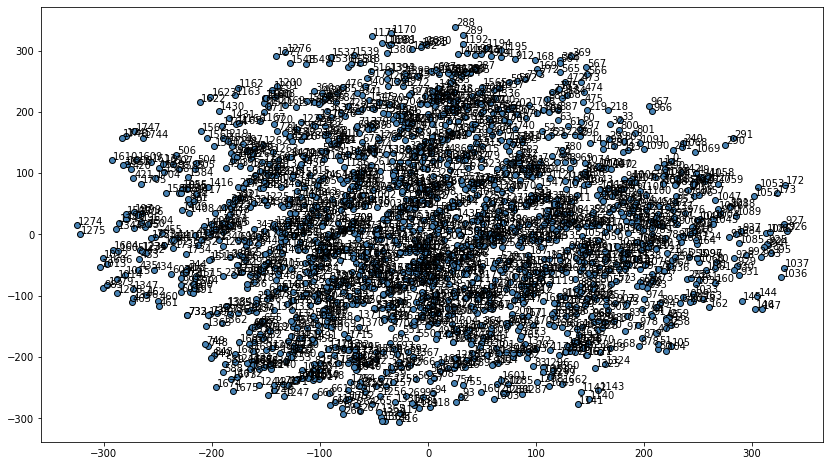

In [ ]:
visualise_sentence_embeddings()  # perplexity=20